In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
import warnings
import prophet

In [4]:
data = pd.read_csv("/workspaces/My-Workspace/Stock Price Prediction with Facebook Prophet Model/Input_csv/IDFCFIRSTB.NS.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-12-12,36.500000,37.950001,36.450001,37.599998,37.599998,6858459
1,2018-12-13,37.900002,39.950001,37.799999,39.400002,39.400002,14693642
2,2018-12-14,39.549999,39.750000,38.400002,39.150002,39.150002,11344083
3,2018-12-17,38.950001,39.599998,38.900002,39.349998,39.349998,4633099
4,2018-12-18,39.200001,41.299999,39.049999,41.200001,41.200001,18819636


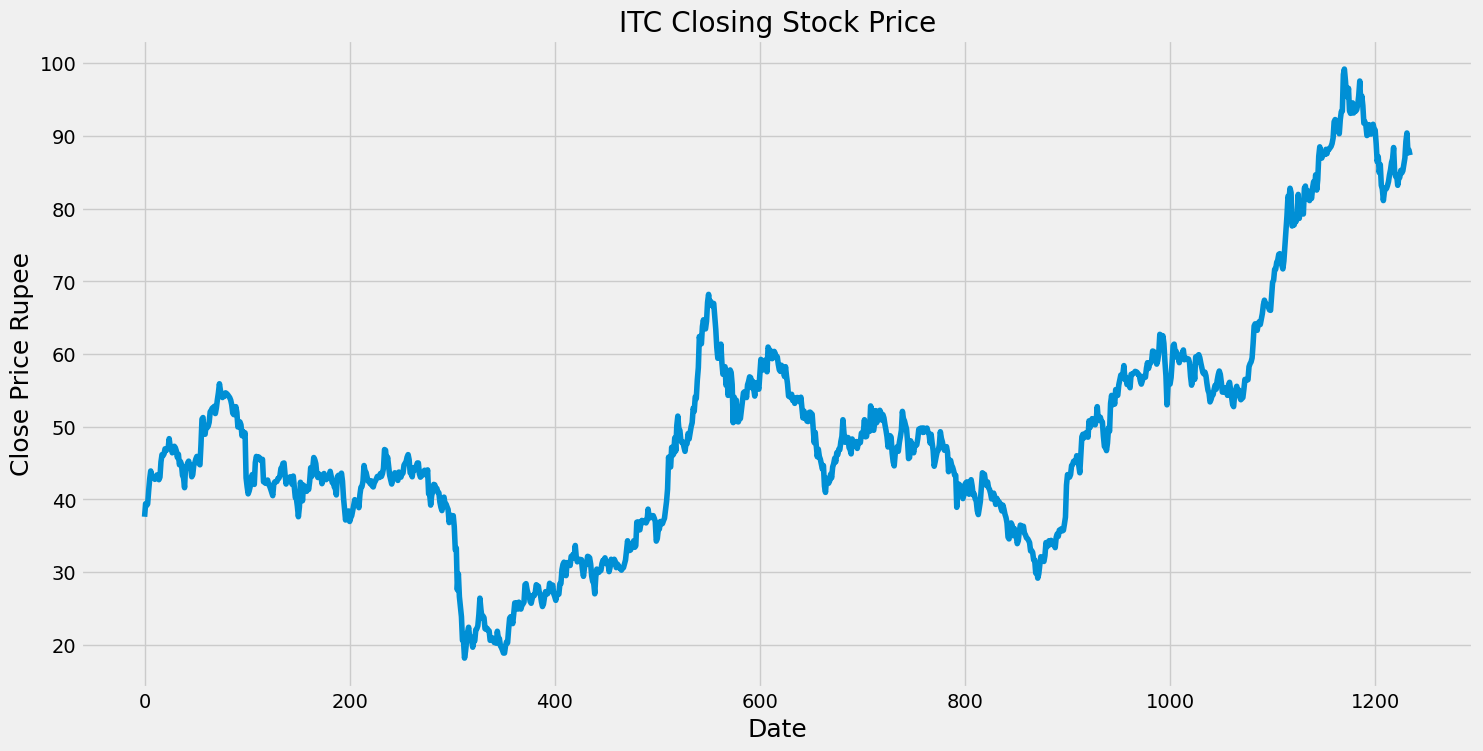

In [5]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(16,8))
plt.title("ITC Closing Stock Price")
plt.plot(data["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price Rupee", fontsize=18)
plt.show()

In [6]:
data = data[["Date","Close"]] 
data = data.rename(columns = {"Date":"ds","Close":"y"})
data.head()

,ds,y
0,2018-12-12,37.599998
1,2018-12-13,39.400002
2,2018-12-14,39.150002
3,2018-12-17,39.349998
4,2018-12-18,41.200001


In [7]:
from prophet import Prophet
m = Prophet(daily_seasonality=True)
m.fit(data)

05:59:15 - cmdstanpy - INFO - Chain [1] start processing
05:59:16 - cmdstanpy - INFO - Chain [1] done processing


/home/codespace/.python/current/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/codespace/.python/current/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


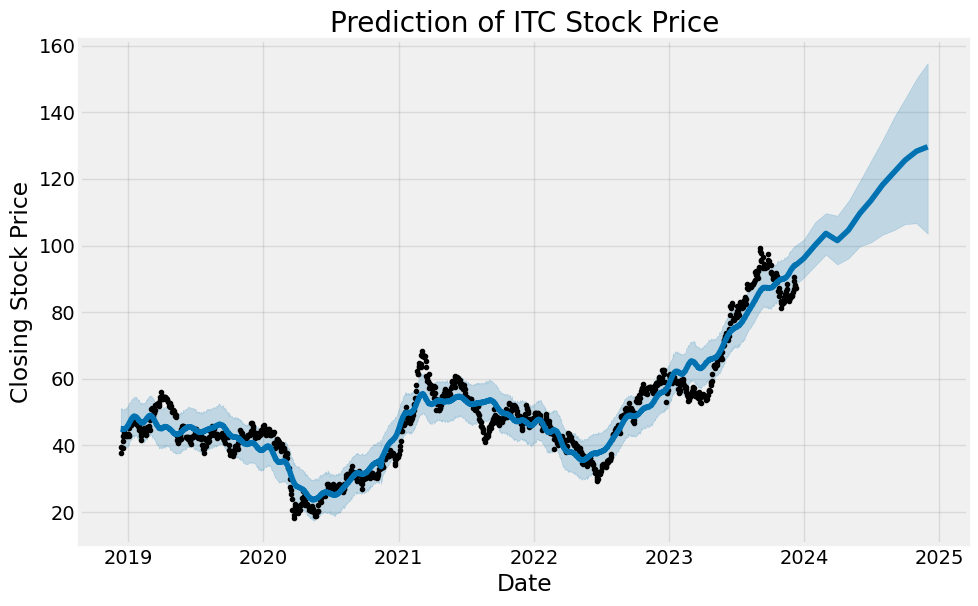

In [8]:
future = m.make_future_dataframe(periods=12, freq='M')
predictions=m.predict(future)
m.plot(predictions)
plt.title("Prediction of ITC Stock Price")
plt.xlabel("Date")
plt.ylabel("Closing Stock Price")
plt.show()

/home/codespace/.python/current/lib/python3.10/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/codespace/.python/current/lib/python3.10/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/home/codespace/.python/current/lib/python3.10/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects inste

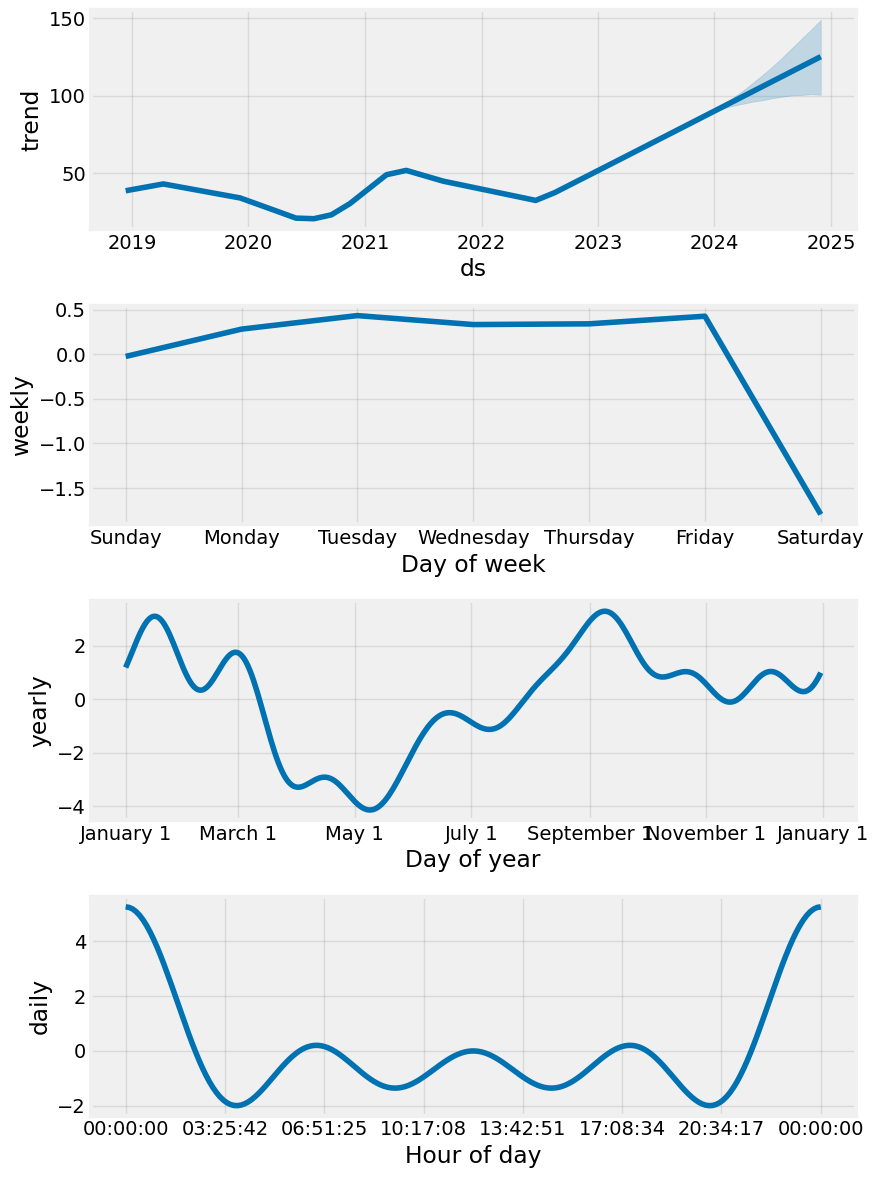

In [9]:
m.plot_components(predictions)
plt.show()